In [30]:
from IPython.display import Image
import pandas as pd

In [31]:
def read_table():
    df = pd.read_csv("../data/blog-post-2.csv")
    return df 

df = read_table()

df

,Model,Data Type,Score,Type,API calls per doc
0,Claude 3 Opus,Reports,0.753000,Full doc,1
1,Claude 3 Opus,Transcripts,0.691000,Full doc,1
2,GPT-4-0125,Reports,0.698000,Full doc,1
3,GPT-4-0125,Transcripts,0.553000,Full doc,1
4,GPT-3-0125,Reports,0.815072,Traditional rag,20
5,GPT-3-0125,Transcripts,0.791220,Traditional rag,20
6,GPT-3-0125,Reports,0.836000,Full doc,Determined by page count
7,GPT-3.5-0125,Transcripts,0.964000,Full doc,Determined by page count
8,GPT-3.5-0125,Reports,0.834130,Used NER to find 20 pages with most number of ...,20
9,GPT-3.5-0125,Transcripts,0.832770,Used NER to find 20 pages with most number of ...,20


Introduction

In our previous white paper, we explored the use of large language models, specifically GPT-3 and GPT-4, for structured information extraction from the Innocence Project New Orleans' wrongful conviction case files. We demonstrated the potential of these models to outperform traditional methods like regex in identifying and extracting details about law enforcement personnel involved in these cases. However, as we continue to refine our approach, it is crucial to investigate and compare various methodologies to optimize the accuracy and efficiency of our information extraction process.

In this follow-up paper, we delve into the evaluation of two key aspects: Traditional RAG vs. Long Context LLM Retrieval, and advanced chunking methods. We aim to provide a comprehensive analysis of how these different approaches impact the performance of our information extraction pipeline. To ensure a thorough evaluation, we tested Claude 3 Opus and GPT-4-0125 on a diverse range of documents, including police reports and trial transcripts, with token counts varying from around 1,000 to over 68,000. This wide range of document types and sizes allows us to assess the robustness and scalability of our methods across different scenarios.

Firstly, we will compare the effectiveness of traditional methods, which often rely on limited context windows, against long context LLM retrieval. The latter leverages the expanded context capabilities of state-of-the-art language models, such as GPT-3 and GPT-4, to better understand and extract relevant information from lengthy legal documents. By examining the performance differences between these two approaches, we hope to identify the optimal context window size for our specific use case.

Secondly, we will explore advanced chunking methods to further enhance the efficiency and accuracy of our information extraction process. Chunking, the process of breaking down large documents into smaller, more manageable segments, plays a crucial role in optimizing the input for language models. We will investigate various chunking strategies, including semantic chunking and adaptive chunking, to determine the most effective approach for our dataset.

Moreover, to provide a more comprehensive evaluation, we will extend our analysis beyond OpenAI models to include Anthropic models. By comparing the performance of models from different providers, we aim to identify the strengths and weaknesses of each platform and determine the most suitable model for our information extraction task.

Through this study, we seek to advance our understanding of the factors that influence the performance of large language models in structured information extraction tasks. By evaluating Traditional RAG vs. Long Context LLM Retrieval and exploring advanced chunking methods across multiple model providers, we strive to develop a more robust and efficient pipeline for extracting critical information from wrongful conviction case files. The insights gained from this research will not only benefit the Innocence Project New Orleans but also contribute to the broader field of natural language processing and its applications in the legal domain.

Full Document Processing With Claude 3 Opus and GPT-4-0125

In full document processing, entire documents are input into the model in a single API call, aiming to utilize the model's full capacity for comprehensive analysis. This approach allows the models to leverage their large context windows to process and analyze the documents in their entirety, potentially capturing intricate relationships and dependencies that may be lost when the text is segmented.

Key Findings:

Challenges with Long Documents: Both models struggled with documents over 50,000 tokens, with Claude 3 Opus achieving a 7.89% match rate and GPT-4-0125 at 0% in their respective longest documents, pointing out the limitations in processing extensive texts.

Strength in Fewer Entities: Both models attained 100% match rates in documents with limited entities, such as Claude 3 Opus in a 5,006-token report with 10 entities and GPT-4-0125 in a 1,149-token testimony with 4 entities.
Persistent Unmatched Entities: Despite iterations, both models left significant entities unmatched in longer documents, indicating a need for algorithmic enhancement.

Correlation Insights: For Claude 3 Opus, the correlation between unique entities and cumulative F-beta score was -0.337, and between token count and F-beta score was -0.275, indicating a slight inverse relationship. GPT-4-0125 exhibited a stronger negative correlation of -0.340 between unique entities and cumulative F-beta score, and a notably higher -0.783 correlation between token count and F-beta score, highlighting the significant impact of document length on performance.

[Insert DF of scores here]

Model	Data Type	Cumulative F Beta Score
Claude 3 Opus	Reports	0.753
Claude 3 Opus	Transcripts	0.691
GPT-4-0125	Reports	0.698
GPT-4-0125	Transcripts	0.553

[Insert graph w token count on x axis and cumulative f beta score on y axis for reports]
[Insert graph w token count on x axis and cumulative f beta score on y axis for transcripts]
[Insert correlation matrix for Claude 3 Opus here]

Claude 3 Opus and GPT-4-Turbo, with an average cumulative F beta score of around 0.724, show competent performance in balancing precision and recall, aligning with the higher end of entity matching efficacy. In contrast, GPT-4's average cumulative F beta score of approximately 0.634 suggests that it may struggle more with the intricacies of full document processing, especially as the document's complexity or the number of entities increases.

The "Multi Needle in a Haystack" blog post from LangChain sheds light on the diminishing performance of long-context language models (LLMs) as the number of facts for retrieval and reasoning increases. In our analysis, the cumulative F beta scores for Claude 3 Opus, GPT-4-Turbo, and GPT-4 provide a parallel narrative, underscoring how these models fare in complex entity matching within full document processing.

Claude 3 Opus shows a moderate inverse relationship between the number of unique entities (or complexity) and the cumulative F-beta score, with correlations of -0.337 for unique entities and -0.275 for token count. This indicates that while Claude 3 Opus is relatively stable, its performance slightly decreases as document complexity increases.

[Insert graph w token count on x axis and cumulative f beta score on y axis for reports]
[Insert graph w token count on x axis and cumulative f beta score on y axis for transcripts]
[Insert correlation matrix for GPT-4-0125 here]

GPT-4-0125 presents a slightly stronger negative correlation of -0.340 between unique entities and cumulative F-beta score and a more pronounced -0.783 correlation with token count. This starkly highlights how increased document length significantly affects GPT-4-0125's entity matching performance.

The "Multi Needle in a Haystack" findings resonate with our observations, especially concerning the performance decline in scenarios requiring the retrieval and reasoning over multiple facts. GPT-4's lower cumulative F beta score and its significant negative correlation with token count (-0.783) reflect a substantial challenge in managing extensive and complex documents, akin to the difficulty in retrieving multiple facts from a large haystack of information.

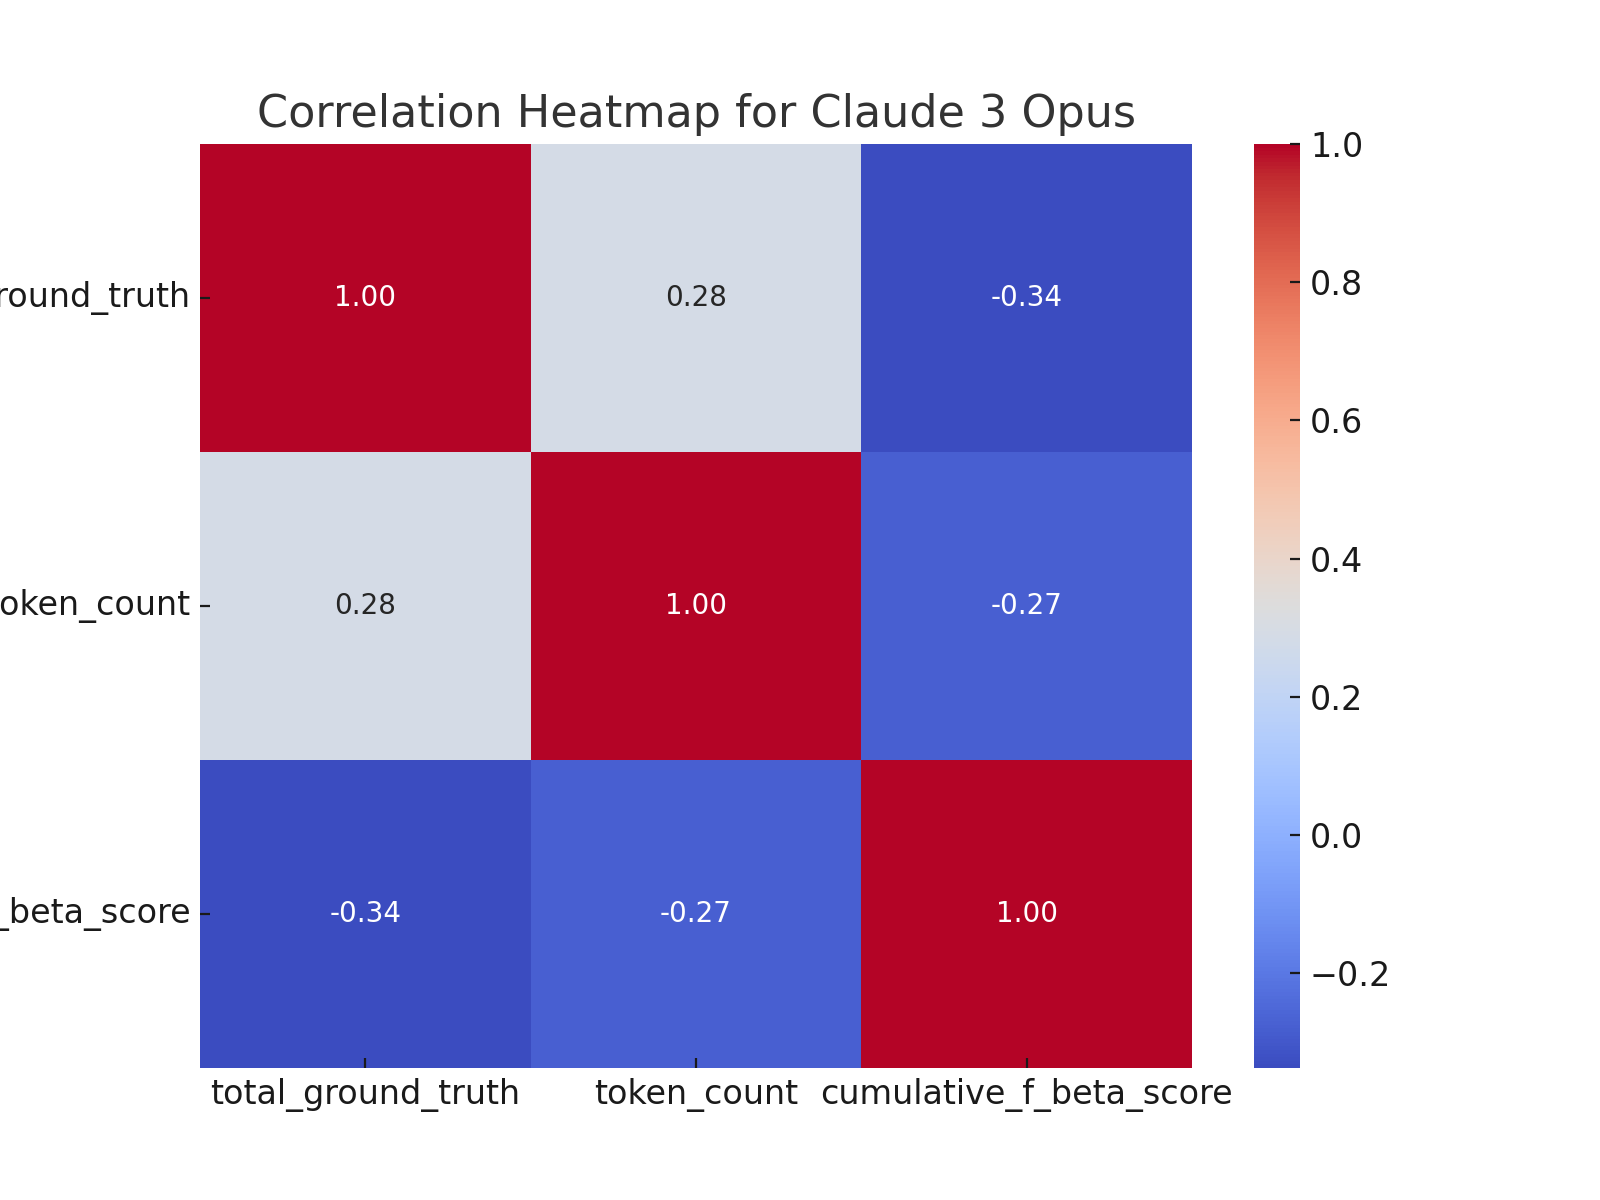

In [32]:
Image(filename='../graphs/claude_3_opus_heatmap.png')

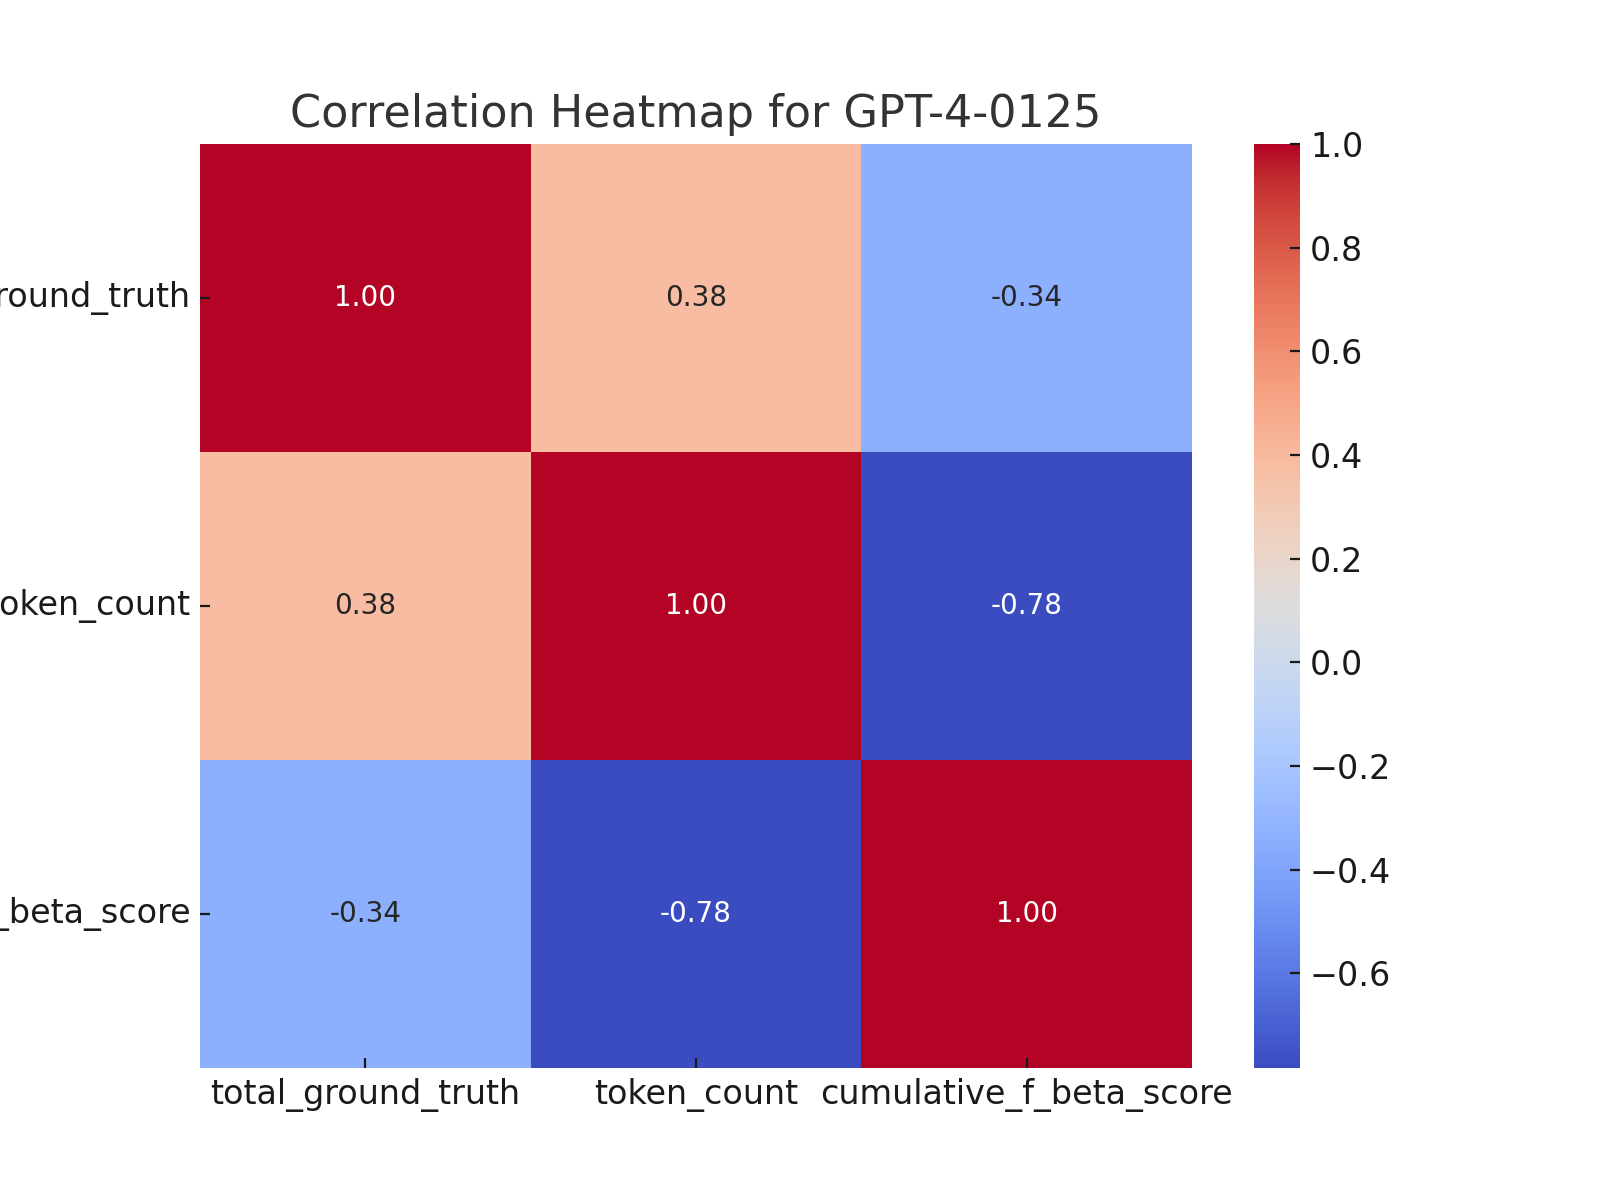

In [33]:
Image(filename='../graphs/gpt4_0125_heatmap.png')

To accommodate smaller models' limitations, an iterative approach was employed, processing the document page by page to simulate a full document context. This method allows the models to analyze the document in smaller, manageable segments while still maintaining a sense of continuity and context across the entire text.

The iterative approach was applied to three models: GPT-3.5-Turbo-0125, Claude 3 Haiku, and Claude 3 Sonnet. The performance of these models was evaluated on two types of documents: police reports and court transcripts. The results are as follows:

GPT-3.5-Turbo-0125:
Reports: 0.524
Transcripts: 0.775

Claude 3 Haiku:
Reports: 0.632
Transcripts: 0.859

Claude 3 Sonnet:
Reports: 0.443
Transcripts: 0.802

The results demonstrate that the iterative approach yields varying levels of success across the different models and document types. Claude 3 Haiku exhibited the best performance among the three models, with an F-beta score of 0.632 for police reports and an impressive 0.859 for court transcripts. This suggests that Claude 3 Haiku is particularly well-suited for processing court transcripts using the iterative approach.

GPT-3.5-Turbo-0125 showed moderate performance, with an F-beta score of 0.524 for police reports and 0.775 for court transcripts. While not as strong as Claude 3 Haiku, GPT-3.5-Turbo-0125 still demonstrated a reasonable ability to handle both document types using the iterative method.

Claude 3 Sonnet, on the other hand, had the lowest performance among the three models. With an F-beta score of 0.443 for police reports and 0.802 for court transcripts, it appears that Claude 3 Sonnet may not be as effective as the other two models in processing these specific document types using the iterative approach.

Interestingly, all three models performed better on court transcripts than on police reports. This could be attributed to the inherent differences in the structure, language, and content of these two document types. Court transcripts may have a more predictable and standardized format, making it easier for the models to extract relevant information iteratively.

The iterative approach demonstrates the potential for adapting smaller language models to handle larger documents by processing them in smaller segments. While the performance may not match that of larger models with full document context, this method still provides a viable alternative when computational resources or model limitations are a concern.

However, it is essential to note that the iterative approach may have its own challenges, such as maintaining coherence and capturing long-range dependencies across the entire document. Further research and refinement of this method could help address these issues and improve the performance of smaller models in handling larger documents.

Abandoning Traditional RAG for Advanced Chunking Techniques
In our early experiments, we utilized the traditional retrieval-augmented generation (RAG) method with the GPT-3-0125 model, which showed promising results, achieving scores of 0.815072 for reports and 0.791220 for transcripts. However, despite these strong performances, we decided to abandon the traditional RAG approach in favor of more advanced chunking techniques.

Our decision was driven by the superior performance of these advanced methods, particularly the technique of extracting the 20 pages with the highest number of named entities. This approach not only provided more targeted and relevant chunks of text for analysis but also streamlined the processing workflow, leading to more efficient and effective information extraction.

As a result, we did not evaluate the traditional RAG method using the Claude models. Our focus shifted to leveraging and refining chunking techniques that capitalized on named entity recognition (NER) to enhance the precision and relevance of the information extracted from large documents.

Advanced Chunking Techniques and Preprocessing with FAISS Database

In our pursuit of more efficient and accurate document analysis, we explored various advanced chunking techniques and preprocessing methods. Our experiments led us to two promising approaches: extracting the 20 pages with the most named entities and utilizing a FAISS database for preprocessing.

Advanced Chunking: Extracting 20 Pages with Most Named Entities

Methodology Overview:
The advanced chunking technique focuses on extracting the 20 pages with the highest number of named entities within a document. By employing Named Entity Recognition (NER), this method scans the document, identifies pages rich in named entities such as people, places, and organizations, and selects the top 20 pages for in-depth analysis.

Performance Scores:
The advanced chunking technique demonstrated impressive performance across different models and document types:

GPT-3.5-Turbo-0125:
Reports: 0.834130
Transcripts: 0.832770

Claude 3 Haiku:
Reports: 0.862806
Transcripts: 0.828494

Claude 3 Sonnet:
Reports: 0.900734
Transcripts: 0.854852

Cost Analysis and Model Selection:

While Claude 3 Sonnet offers the best performance, its higher cost aligns it with budget-flexible entities aiming for top-tier data analysis. Claude 3 Haiku provides a cost-effective alternative, balancing solid performance with affordability. The analysis suggests a shift from GPT-3.5-Turbo-0125 to Claude models, particularly Claude 3 Haiku, for a more economical yet effective data extraction process.

Preprocessing with FAISS Database

We experimented with a preprocessing approach utilizing a FAISS database to enhance the efficiency and accuracy of our document analysis. This method involved two distinct variants of a preprocess_document function designed to extract relevant text chunks, generate BERT embeddings, perform deduplication, and store the results in a FAISS database for swift retrieval.

Variant 1: Law Enforcement-focused NER

Document Loading: A JSON document is loaded, and named entities, specifically those related to law enforcement titles, are identified.
Chunk Extraction: Text surrounding these identified entities is extracted based on a predefined context window size.
Embedding Generation: BERT embeddings are created for these text chunks to capture semantic information.
Deduplication: Chunks are deduplicated using cosine similarity, eliminating redundant data.
Database Creation: A FAISS database is compiled, housing the unique, deduplicated chunks and their embeddings.

Variant 2: General NER

Document Loading: The function begins by loading a JSON document and identifying all named entities within the text.

Context Extraction: It then extracts contexts for each unique named entity using a specified window size.

Embedding and Deduplication: BERT embeddings are generated for these contexts, followed by deduplication based on cosine similarity and a similarity threshold.

Chunk Creation: Artificial chunks are formed by concatenating deduplicated contexts and dividing them into fixed-size chunks with overlap.

Database Assembly: A FAISS database is established, containing all the processed chunks and embeddings.

Initially, this preprocessing method appeared attractive because it promised a nuanced extraction process, capable of identifying and focusing on the most relevant sections of text. However, after conducting experiments with GPT-3.5-Turbo, we discovered that our 20-page chunking method yielded superior results:

Consequently, we abandoned further experiments with the Claude model for this preprocessing technique. The decision was driven by the comparative performance where the 20-page chunking method, although simpler, outperformed the more complex FAISS-based preprocessing in extracting pertinent information efficiently. This led us to prioritize the chunking method that not only demonstrated better performance but also offered operational simplicity and efficiency, especially with GPT-3.5-Turbo.

Moving forward, our focus remains on refining and optimizing the 20-page chunking method, as it has proven to be the most effective and efficient approach for our document analysis tasks. By continually improving this technique, we aim to further enhance the accuracy and speed of information extraction from large and complex documents.


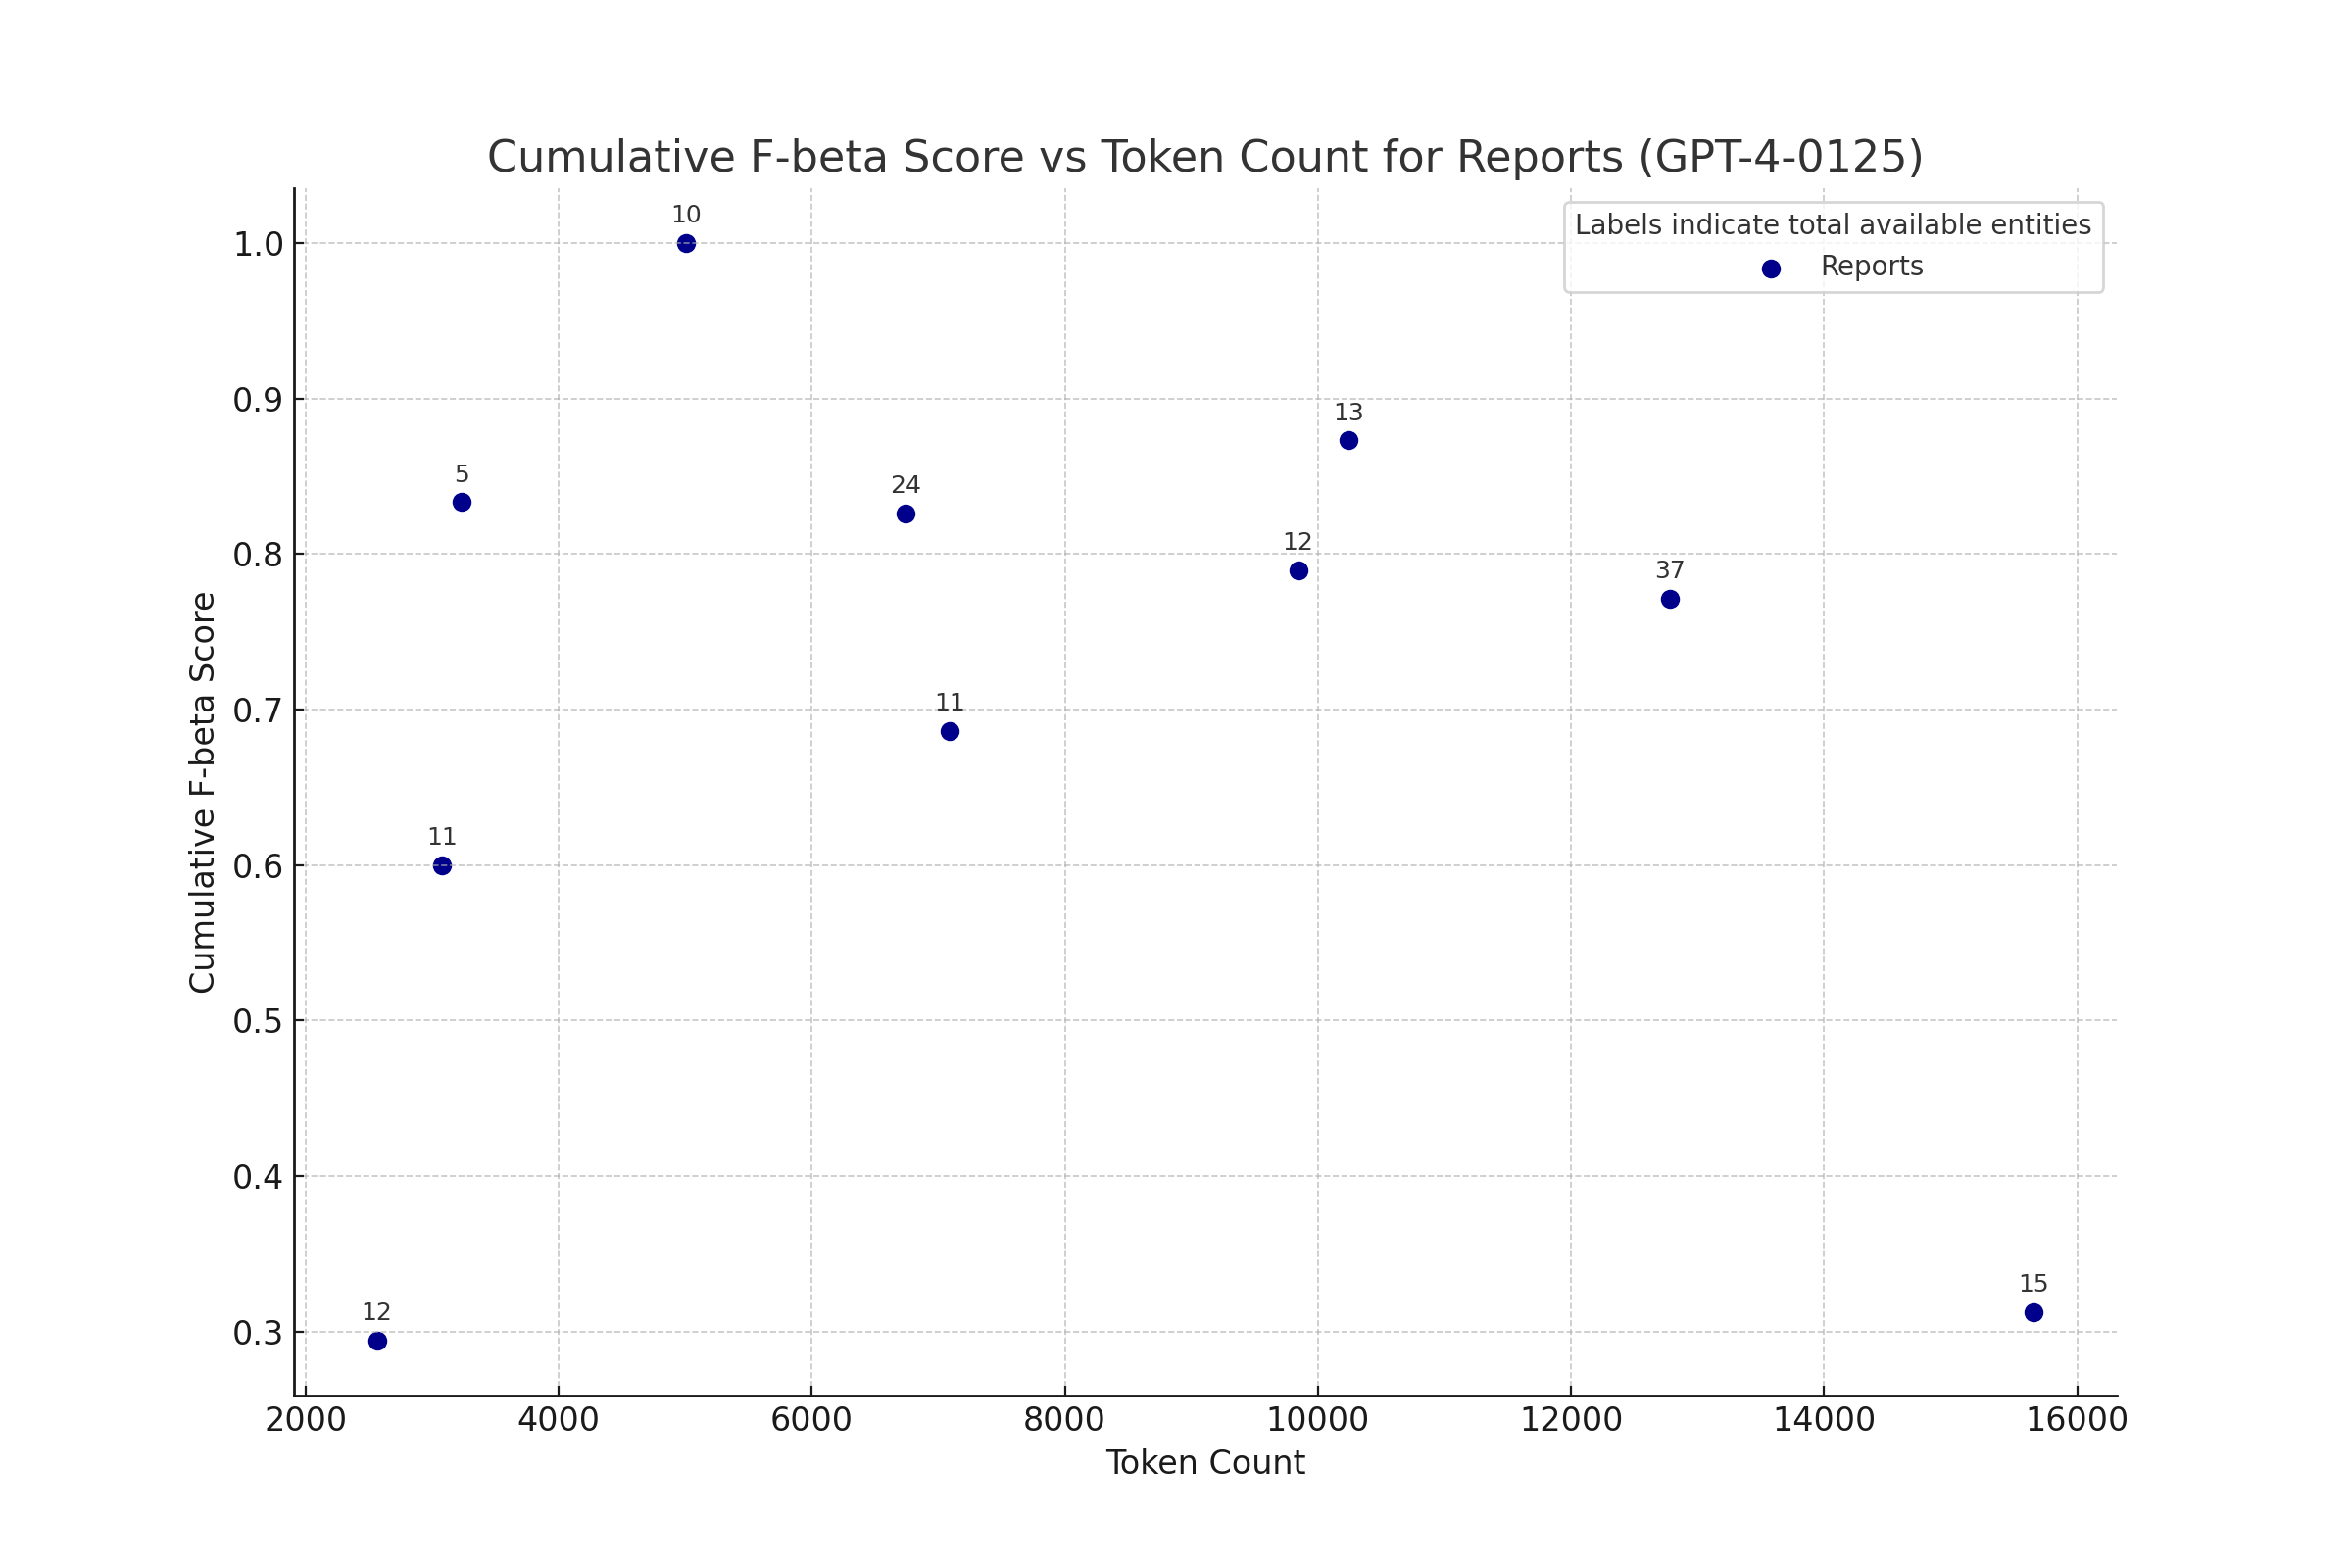

In [34]:
Image(filename='../graphs/reports_gpt-4-0125.png')

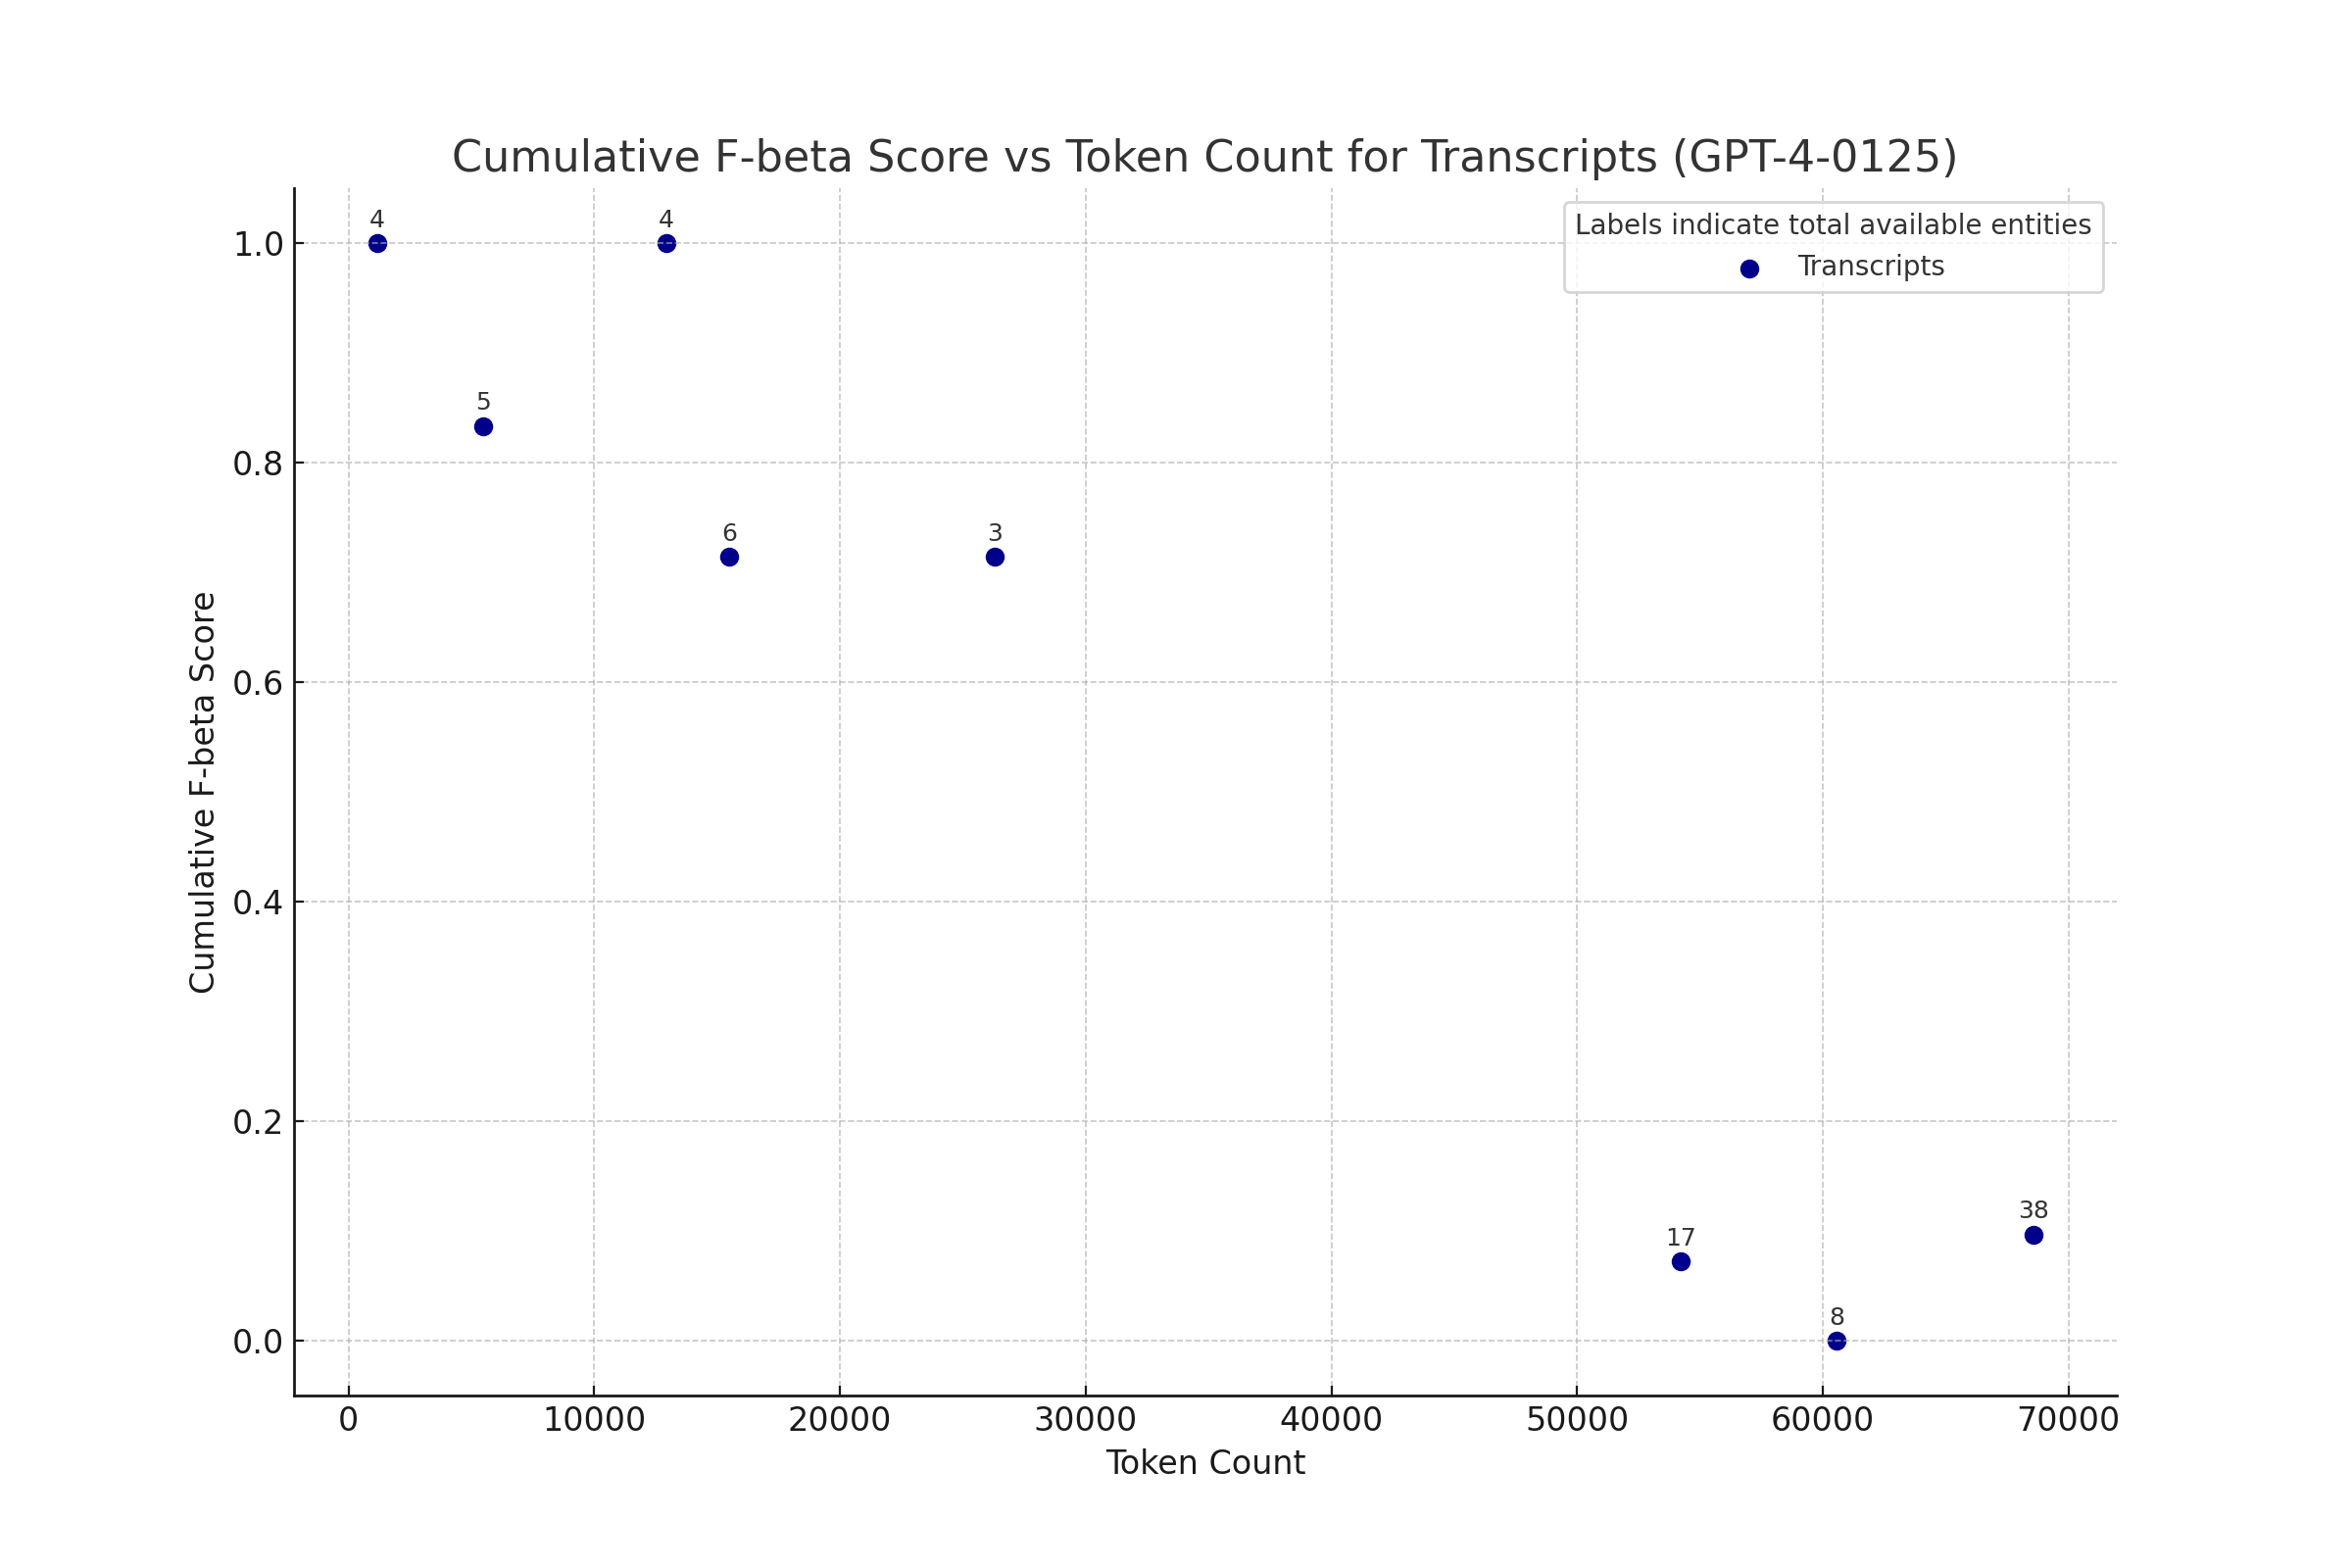

In [35]:
Image(filename='../graphs/transcripts_gpt-4-0125.png')

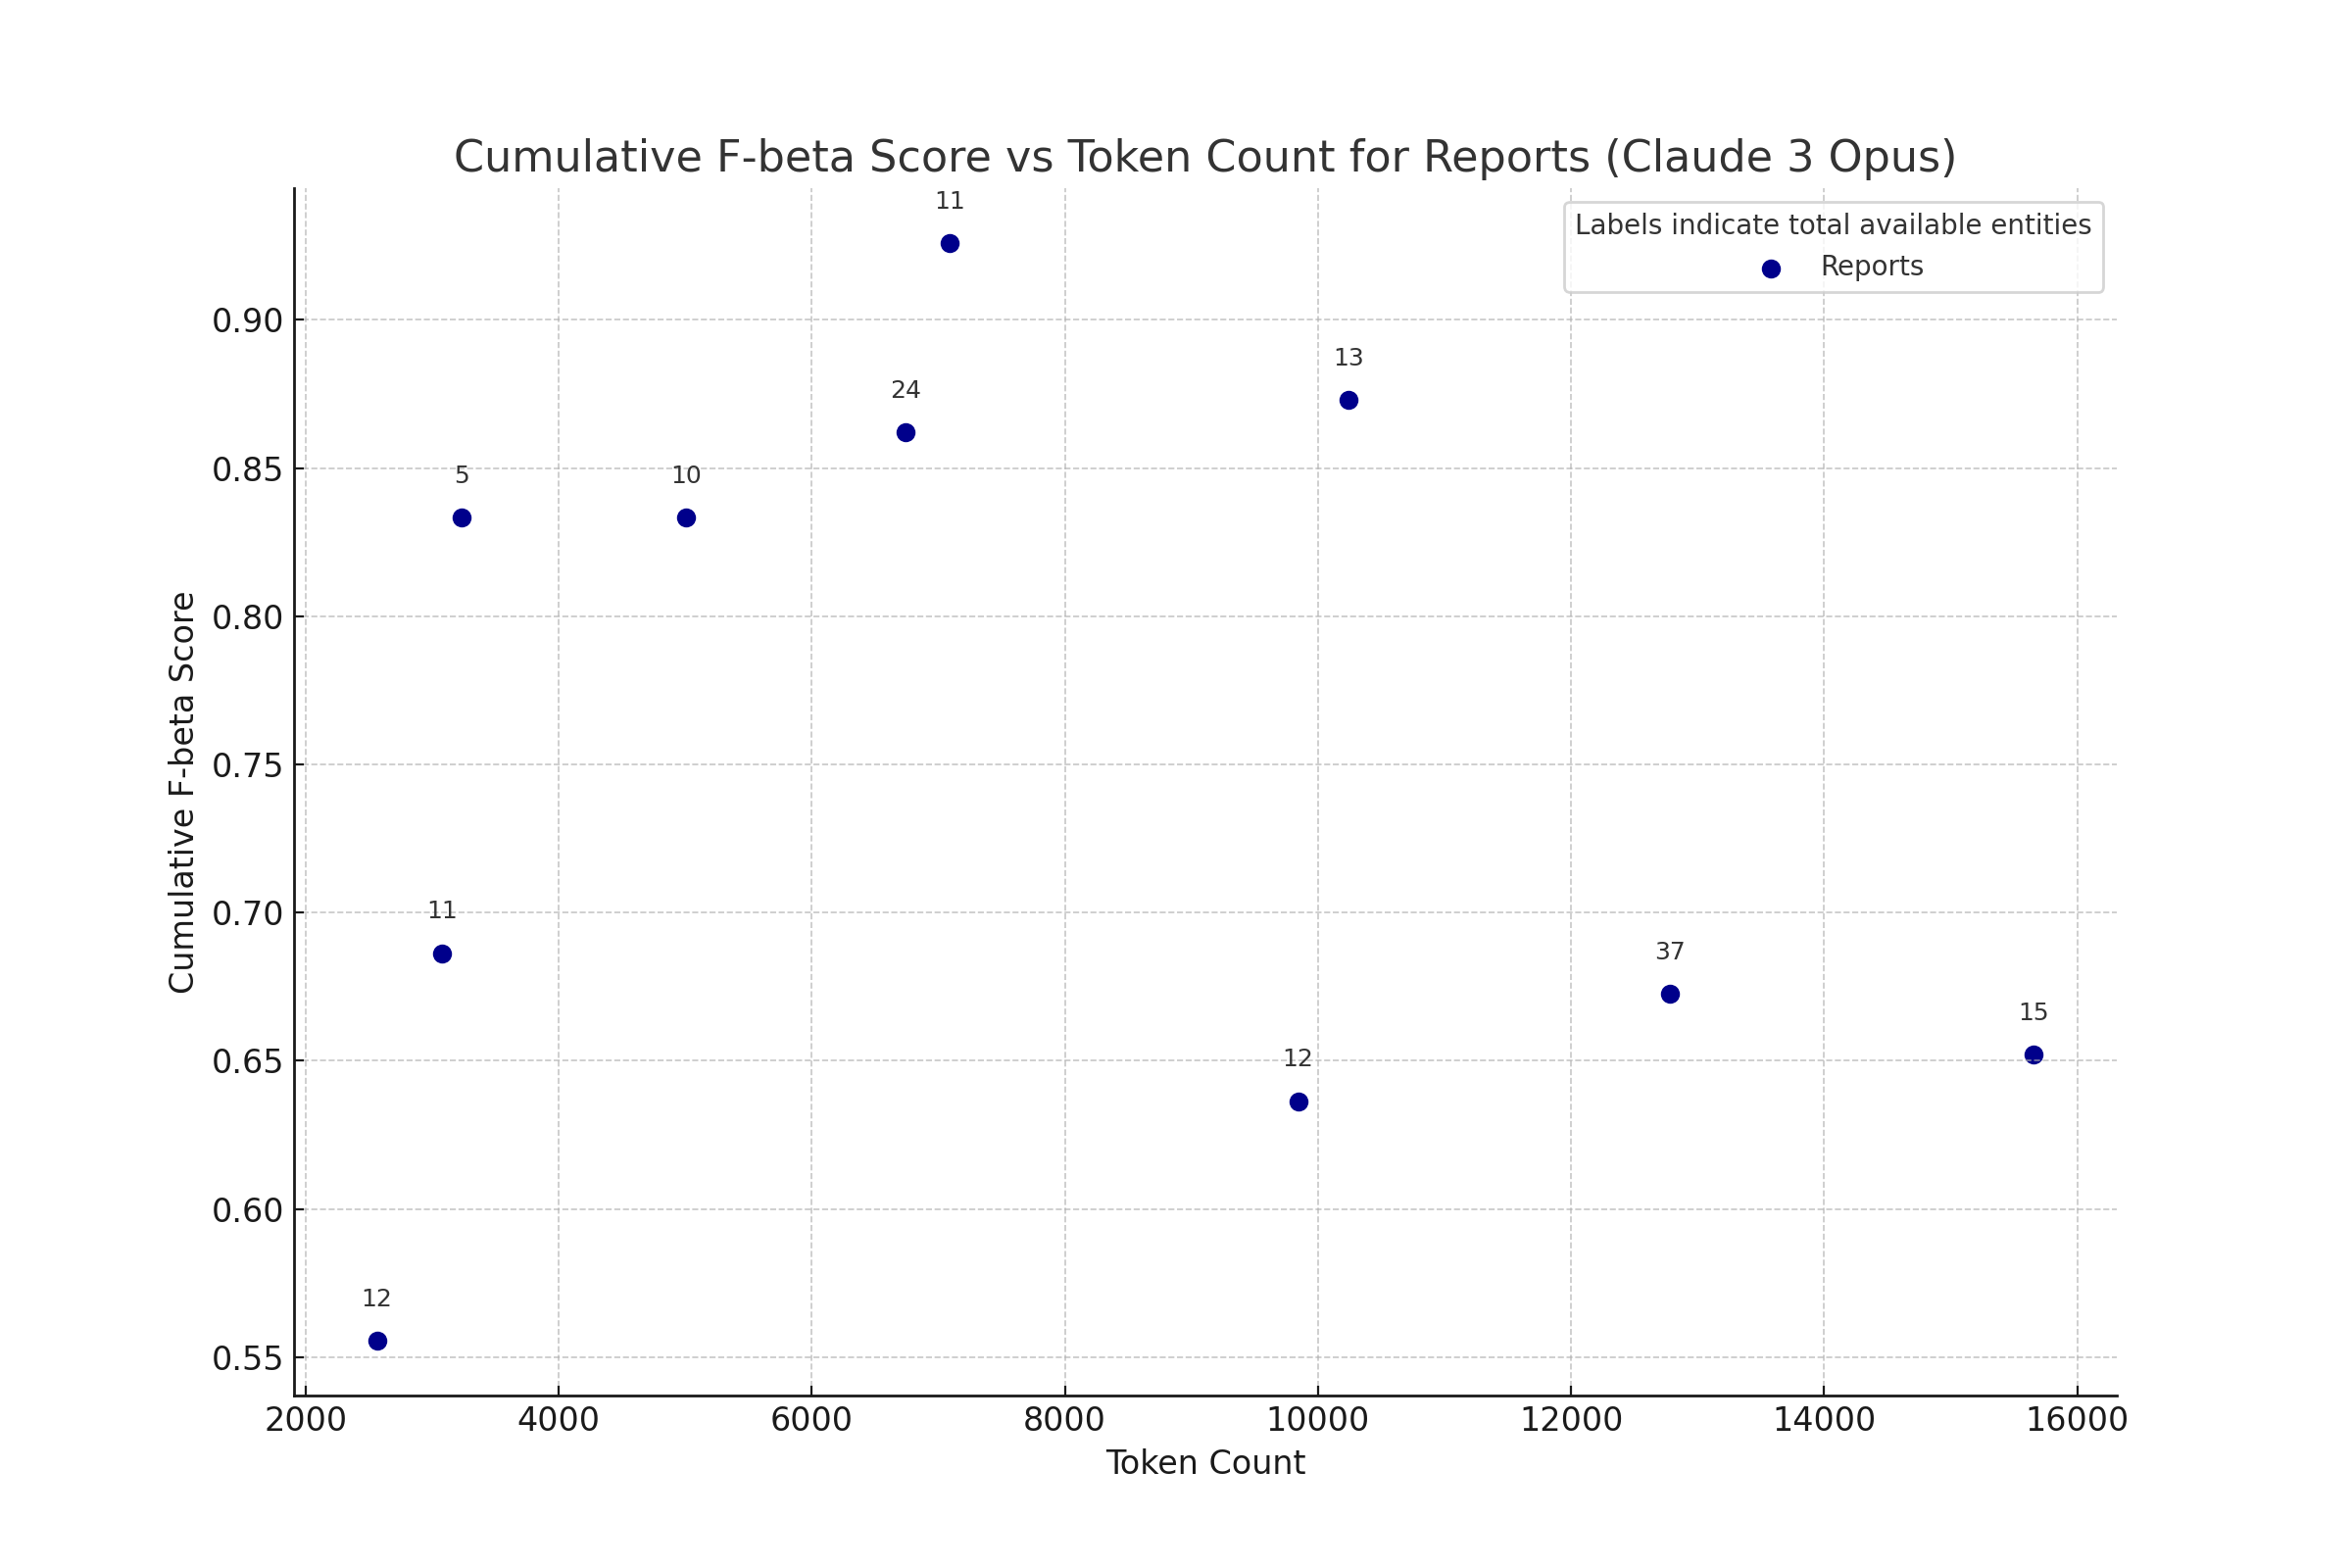

In [36]:
Image(filename='../graphs/reports_opus.png')

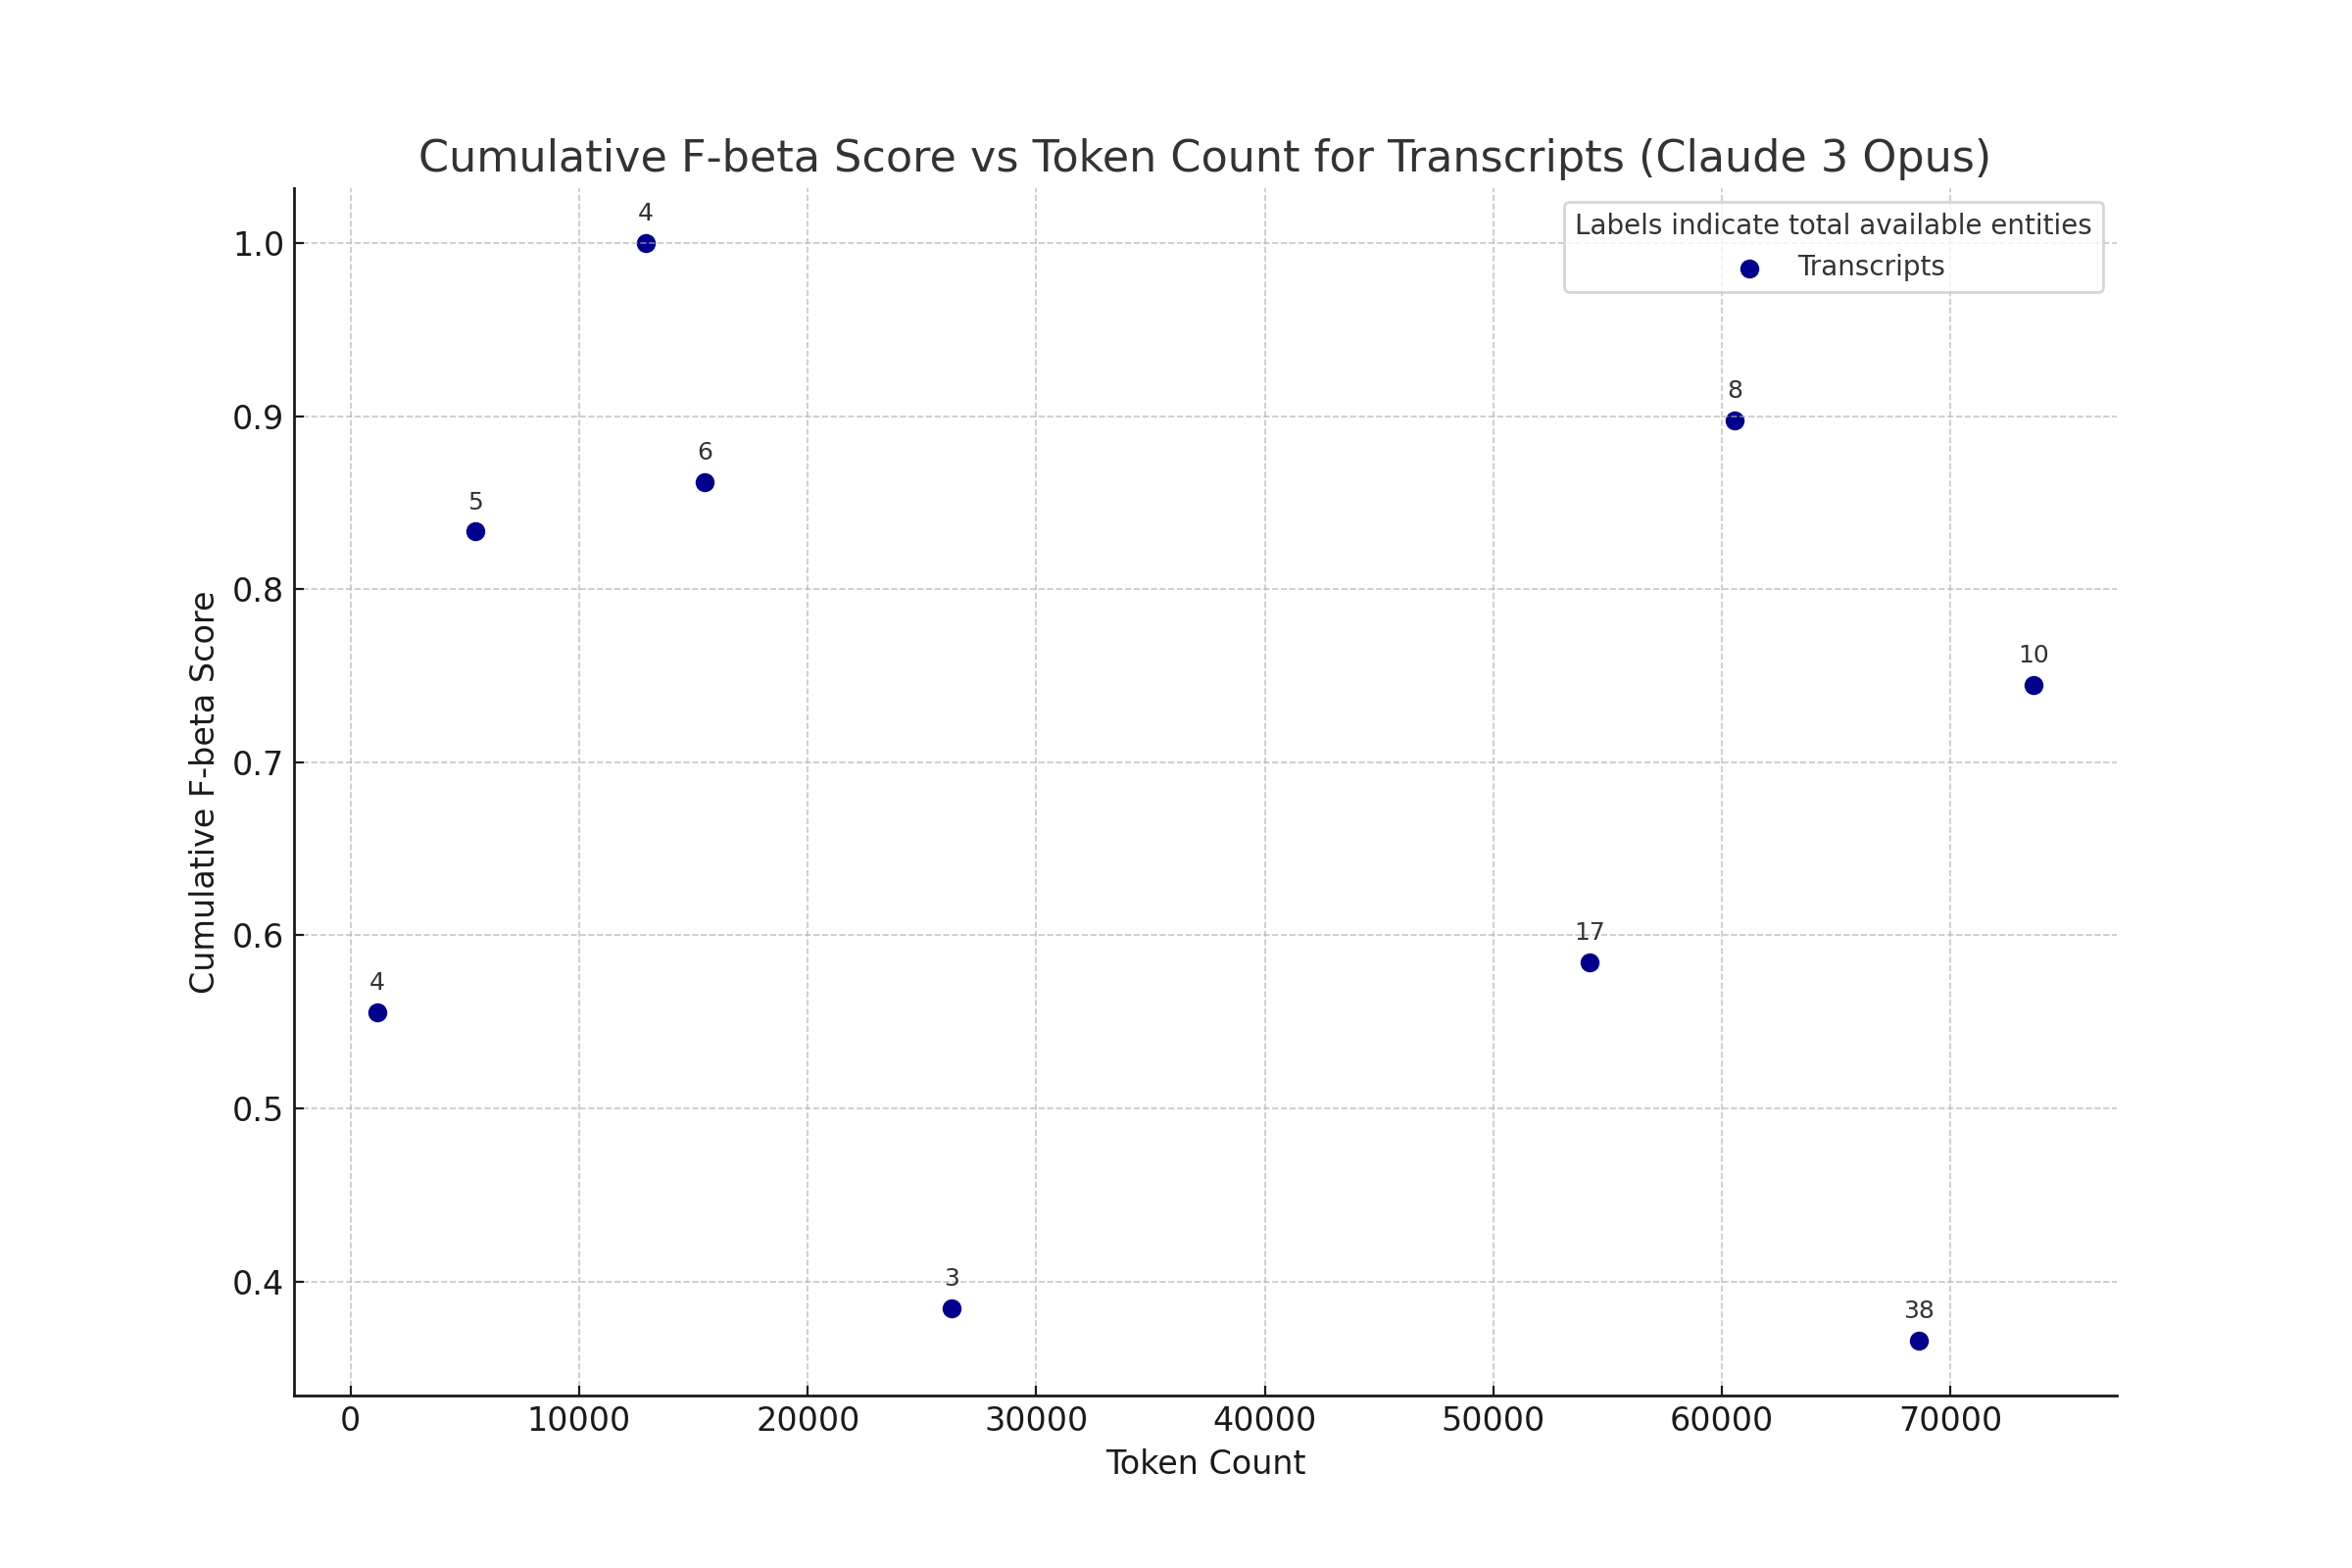

In [37]:
Image(filename='../graphs/transcripts_opus.png')